In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.tools import diff
from scipy.stats.distributions import chi2

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [3]:
data = pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col='Quarter',parse_dates=True)
data.index.freq = 'Q'
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [4]:
data.shape

(42, 1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0+ bytes


In [6]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


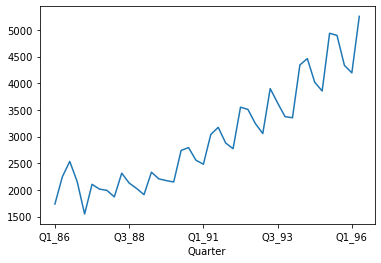

In [7]:
data['Sales'].plot()
plt.show()

### Augmented Dickey Fuller Test for Stationarity

In [8]:
adfuller(data.Sales)

(1.3094210153268104,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

Fail to reject the null hypothesis. <br>
The given data is not stationary.

### Triple Exponential Smoothing for non-stationary data

In [9]:
data['Mul_Mul'] = ExponentialSmoothing(data['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data['Add_Mul'] = ExponentialSmoothing(data['Sales'],trend='add',seasonal='mul',seasonal_periods=12).fit().fittedvalues
data['Mul_Add'] = ExponentialSmoothing(data['Sales'],trend='mul',seasonal='add',seasonal_periods=12).fit().fittedvalues
data['Add_Add'] = ExponentialSmoothing(data['Sales'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues

In [10]:
data

,Sales,Mul_Mul,Add_Mul,Mul_Add,Add_Add
Quarter,,,,,
Q1_86,1734.827000,1894.051461,1802.547462,1739.857196,1740.267964
Q2_86,2244.960999,2243.246996,2149.416396,2196.058652,2197.306357
Q3_86,2533.804993,2572.028600,2430.672488,2434.143594,2433.961102
Q4_86,2154.962997,2211.500360,2189.754709,2337.569917,2268.024343
Q1_87,1547.818996,1798.797465,1804.575079,1885.527122,1803.826485
Q2_87,2104.411995,2224.599968,2172.770553,2293.566042,2260.925318
Q3_87,2014.362999,2071.892679,1990.672570,2095.725603,2074.444095
Q4_87,1991.746998,1977.296564,1894.004599,2004.383674,1968.917038
Q1_88,1869.049999,1932.036464,1876.342842,1975.697570,1890.903427


In [11]:
mse_1 = mean_squared_error(data['Sales'],data['Mul_Mul'])

mse_2 = mean_squared_error(data['Sales'],data['Add_Mul'])

mse_3 = mean_squared_error(data['Sales'],data['Mul_Add'])

mse_4 = mean_squared_error(data['Sales'],data['Add_Add'])

In [12]:
print(mse_1)
print(mse_2)
print(mse_3)
print(mse_4)

26704.684078674396
25011.882129106925
38102.64877995233
41579.7574412387


Triple exponential smoothing model with additive trend and multiplicative seasonality shows the best result.

In [13]:
print('RMSE = ',np.round(np.sqrt(mse_2)),2)

RMSE =  158.0 2


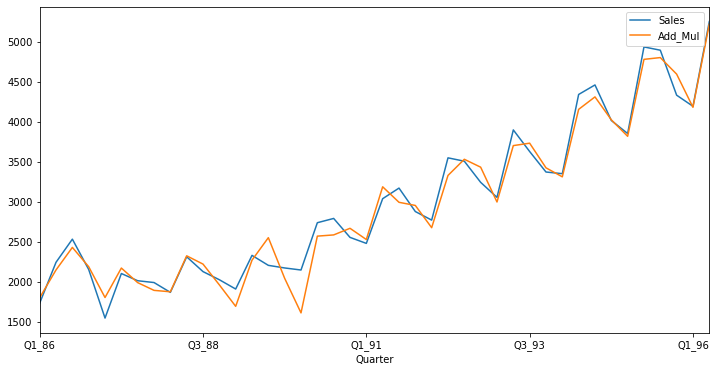

In [14]:
data[['Sales','Add_Mul']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

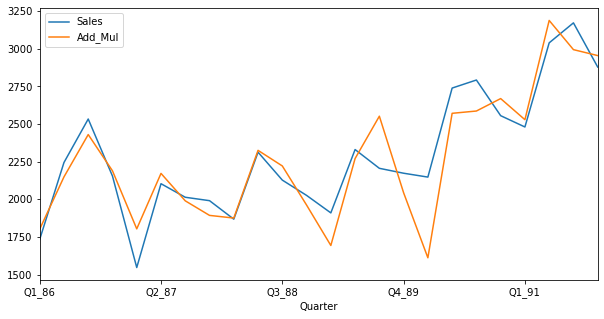

In [15]:
data[['Sales','Add_Mul']].iloc[:24].plot(figsize=(10,5)).autoscale(axis='x',tight=True)

In [16]:
del data['Mul_Mul']
del data['Mul_Add']
del data['Add_Add']
del data['Add_Mul']

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, Q1_86 to Q2_96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [18]:
train_data = data.iloc[:34]
test_data = data.iloc[34:]

In [19]:
train_data

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [24]:
TES = ExponentialSmoothing(train_data['Sales'],trend='add',seasonal='mul',seasonal_periods=4)
TES_fitted = TES.fit()

In [25]:
test_pred = TES_fitted.forecast(8)
test_pred

34    4215.121510
35    3869.493970
36    3620.133255
37    4579.126709
38    4466.455905
39    4096.830840
40    3829.741246
41    4840.477923
dtype: float64

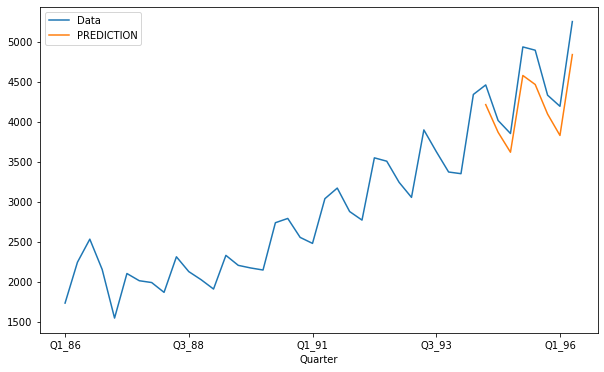

In [32]:
data['Sales'].plot(legend=True,label='Data')
test_pred.plot(legend=True,label='PREDICTION',figsize=(10,6))
plt.show();

## ACF plot

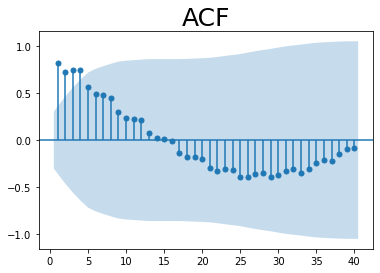

In [33]:
sgt.plot_acf(data['Sales'],lags=40,zero=False)
plt.title('ACF',size=25)
plt.show()

## PACF Plot

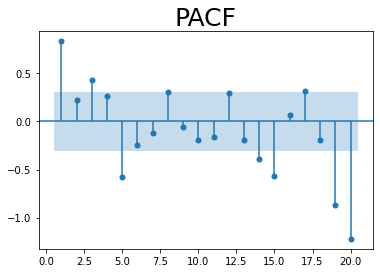

In [35]:
sgt.plot_pacf(data['Sales'],lags=20,zero=False)
plt.title('PACF',size=25)
plt.show()

## LLR Test

In [36]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

### AR model

In [37]:
ar_1 = ARMA(data.Sales,order=(1,0))
ar_1_fit = ar_1.fit()
ar_1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                     ARMA(1, 0)   Log Likelihood                -315.765
Method:                       css-mle   S.D. of innovations            434.561
Date:                Tue, 16 Aug 2022   AIC                            637.530
Time:                        23:08:33   BIC                            642.743
Sample:                             0   HQIC                           639.441
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3200.1146    817.353      3.915      0.000    1598.132    4802.097
ar.L1.Sales     0.9365      0.058     16.173      0.000       0.823       1.050
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0679           +0.0000j            1.0679            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
ar_2 = ARMA(data.Sales,order= (2,0))
ar_2_fit = ar_2.fit()

In [39]:
LLR_test(ar_1,ar_2)

0.579

In [40]:
ar_3 = ARMA(data.Sales,order=(3,0))
ar_3_fit = ar_3.fit()

In [41]:
LLR_test(ar_2,ar_3)

0.0

Reject null hypothesis.

In [42]:
ar_4 = ARMA(data.Sales,order=(4,0))
ar_4_fit = ar_4.fit()

In [43]:
LLR_test(ar_3,ar_4)

0.002

Reject null hypothesis.

In [44]:
ar_5 = ARMA(data.Sales,order=(5,0))
ar_5_fit = ar_5.fit()

In [45]:
LLR_test(ar_4,ar_5)

0.0

Reject null hypothesis.

In [47]:
ar_6 = ARMA(data.Sales,order=(6,0))
ar_6_fit = ar_6.fit()

In [49]:
LLR_test(ar_5,ar_6)

1.0

The p-value is greater than 0.05.<br>
Therefore we fail to reject the null hypothesis.<br>
ar_5 is a better model compared to ar_6.

In [59]:
model_ar5 = ARMA(train_data.Sales,order=(4,0))
ar_5_fit = model_ar5.fit()

In [60]:
ar5_test_pred = ar_5_fit.predict(34,42)
ar5_test_pred

34    3877.513602
35    3408.553189
36    3461.204857
37    4036.297696
38    3895.775558
39    3499.362868
40    3501.838111
41    3866.008067
42    3852.305774
dtype: float64